None


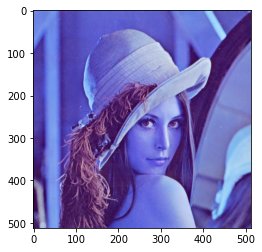

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Data/lenna.png", -1) #-1 means colors of image are unchangable
print(cv2.imshow("image", img))

plt.imshow(img) #image will be displayed as BGR, and you need to convert it to RGB
cv2.waitKey(0)
cv2.destroyAllWindows()

None


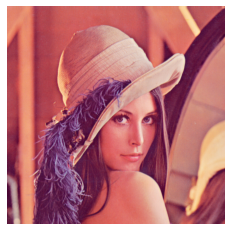

In [10]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Data/lenna.png", -1) #-1 means colors of image are unchangable
print(cv2.imshow("image", img))

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Image will be displayed in RGB
plt.imshow(img2)
plt.axis("off")


cv2.waitKey(0)
cv2.destroyAllWindows()

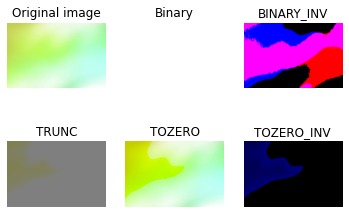

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Data/gradient.jpg", 1)
_, th1 = cv2.threshold(img, 55, 255, cv2.THRESH_BINARY)            
_, th2 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ["Original image", "Binary", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img, th1, th2, th3, th4, th5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    
    #plt.xticks([]), plt.yticks([])
    #OR
    plt.axis("off")

plt.show()

# Morphological Transformations
it used to enhance the images, like remove the noise

it contains simple operations based on the image shape.

Normally peroformed on the binary images

to implement this technique, we need the original image and a kernal which tells you how to change the value of any given pixel by combining it with different amounts of the neighbouring pixels.

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("Data/Smarties-UK-Candies.jpg",0)
img = cv2.resize(img, (500,500))

_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)
mask = cv2.resize(mask, (500, 500))

kernal = np.ones((2,2), np.uint8)

#the below methods, you need to read about them in order to understand the 
#real work of them, my explaination is general, you have not rely on this 
#explanation only, you have to understand how the pixels are work with 
#the methods
dilation = cv2.dilate(mask, kernal, iterations = 5) #simply in my mind, 
                                #the white color is exteneded over black
erosion = cv2.erode(mask, kernal, iterations = 5) #oppsite of dilation,
                                #black color extended over white
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal, iterations = 5) 
#opening it works by apply erosion then dilation

closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal, iterations = 3)


#cv2.imshow("img", img)
cv2.imshow("mask", mask)
#cv2.imshow("dilation", dilation)
#cv2.imshow("erosion", erosion)
#cv2.imshow("opening", opening)
cv2.imshow("closing", closing)
cv2.waitKey(0)
cv2.destroyAllWindows()